In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [44]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

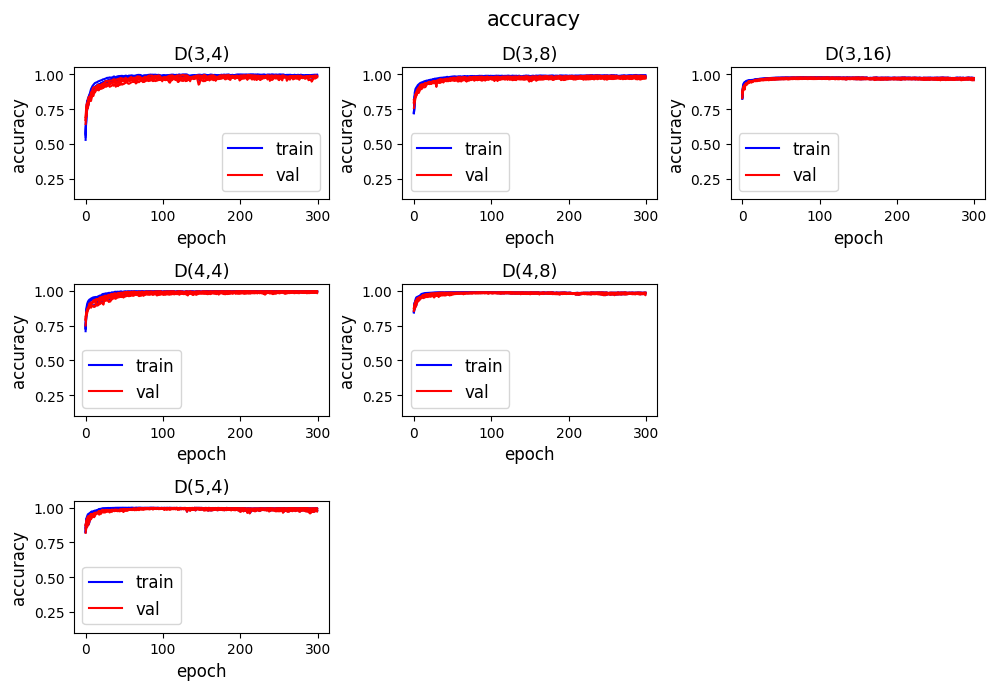

In [45]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 

In [46]:
all_accuracies = load_accuracies(paths, n_runs=5, val_steps=1, zero_shot=True, context_unaware=True)
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
#              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'],
#              all_accuracies['cu_train_acc'], all_accuracies['cu_val_acc']]
zero_shot_accs_specific = all_accuracies['zs_specific_test_acc']
zero_shot_accs_generic = all_accuracies['zs_generic_test_acc']
cu_zs_accs_specific = all_accuracies['cu_zs_specific_test_acc']
cu_zs_accs_generic = all_accuracies['cu_zs_generic_test_acc']

In [47]:
for i, dataset in enumerate(zero_shot_accs_specific):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_specific[i].mean(), 3)) + " (" + str(round(cu_zs_accs_specific[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.913 (0.017)
(context-unaware) Mean test accuracy over runs: 0.921 (0.013)
(standard) Mean test accuracy over runs: 0.846 (0.014)
(context-unaware) Mean test accuracy over runs: 0.918 (0.006)
(standard) Mean test accuracy over runs: 0.82 (0.032)
(context-unaware) Mean test accuracy over runs: 0.895 (0.012)
(standard) Mean test accuracy over runs: 0.951 (0.004)
(context-unaware) Mean test accuracy over runs: 0.941 (0.011)
(standard) Mean test accuracy over runs: 0.946 (0.008)
(context-unaware) Mean test accuracy over runs: 0.92 (0.009)
(standard) Mean test accuracy over runs: 0.955 (0.007)
(context-unaware) Mean test accuracy over runs: 0.948 (0.007)


In [48]:
for i, dataset in enumerate(zero_shot_accs_generic):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_generic[i].mean(), 3)) + " (" + str(round(cu_zs_accs_generic[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.709 (0.041)
(context-unaware) Mean test accuracy over runs: 0.626 (0.036)
(standard) Mean test accuracy over runs: 0.682 (0.053)
(context-unaware) Mean test accuracy over runs: 0.609 (0.025)
(standard) Mean test accuracy over runs: 0.626 (0.029)
(context-unaware) Mean test accuracy over runs: 0.652 (0.042)
(standard) Mean test accuracy over runs: 0.832 (0.072)
(context-unaware) Mean test accuracy over runs: 0.777 (0.087)
(standard) Mean test accuracy over runs: 0.821 (0.072)
(context-unaware) Mean test accuracy over runs: 0.832 (0.043)
(standard) Mean test accuracy over runs: 0.832 (0.058)
(context-unaware) Mean test accuracy over runs: 0.817 (0.067)


In [49]:
# get accuracy means and sds for table representation
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.993, 0.003),
 '(3,8)': (0.984, 0.006),
 '(3,16)': (0.969, 0.005),
 '(4,4)': (0.995, 0.003),
 '(4,8)': (0.984, 0.004),
 '(5,4)': (0.985, 0.007)}

In [50]:
# context unaware
final_accuracies_train = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_train_acc'][i][run][-1])
    final_accuracies_train[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_train

{'(3,4)': (0.995, 0.002),
 '(3,8)': (0.993, 0.003),
 '(3,16)': (0.981, 0.007),
 '(4,4)': (0.992, 0.002),
 '(4,8)': (0.961, 0.011),
 '(5,4)': (0.98, 0.011)}

In [51]:
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.983, 0.004),
 '(3,8)': (0.977, 0.006),
 '(3,16)': (0.968, 0.006),
 '(4,4)': (0.993, 0.005),
 '(4,8)': (0.982, 0.006),
 '(5,4)': (0.984, 0.008)}

In [52]:
# context unaware
final_accuracies_val = {}
for i, d in enumerate(datasets):
    gather_accuracies = []
    for run in range(5):
        gather_accuracies.append(all_accuracies['cu_val_acc'][i][run][-1])
    final_accuracies_val[d] = (round(np.mean(gather_accuracies), 3), round(np.std(gather_accuracies), 3))
final_accuracies_val

{'(3,4)': (0.99, 0.003),
 '(3,8)': (0.989, 0.004),
 '(3,16)': (0.979, 0.008),
 '(4,4)': (0.989, 0.002),
 '(4,8)': (0.961, 0.011),
 '(5,4)': (0.979, 0.012)}

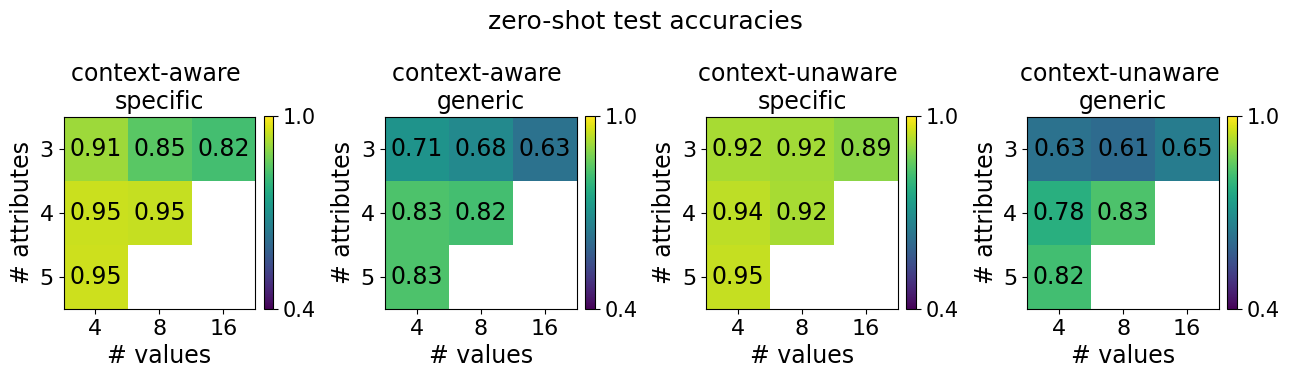

In [53]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc'],
              all_accuracies['cu_zs_specific_test_acc'], all_accuracies['cu_zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='zero-shot test accuracies', 
             titles=('context-aware \nspecific', 'context-aware \ngeneric', 'context-unaware \nspecific', 'context-unaware \ngeneric'),
             fontsize=17)